In [1]:
import qiskit
import numpy as np, matplotlib.pyplot as plt
import qtm.base, qtm.constant, qtm.ansatz

In [2]:
num_qubits = 4
theta = np.random.uniform(0, 2*np.pi)

In [3]:
thetas = np.zeros((2*num_qubits*3))
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.ansatz.create_ghz_state(qc, theta)

thetas, loss_values_sgd = qtm.base.fit(
    qc, num_steps = 150, thetas = thetas, 
    create_circuit_func = qtm.ansatz.u_cluster_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.loss.loss_basis,
    optimizer = qtm.optimizer.sgd,
    verbose = 1
)


Step: 100%|██████████| 150/150 [05:13<00:00,  2.09s/it]


In [4]:
thetas = np.zeros((2*num_qubits*3))
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.ansatz.create_ghz_state(qc, theta)

thetas, loss_values_adam = qtm.base.fit(
    qc, num_steps = 150, thetas = thetas, 
    create_circuit_func = qtm.ansatz.u_cluster_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.loss.loss_basis,
    optimizer = qtm.optimizer.adam,
    verbose = 1
)


Step: 100%|██████████| 150/150 [05:41<00:00,  2.28s/it]


In [5]:
thetas = np.zeros((2*num_qubits*3))
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.ansatz.create_ghz_state(qc, theta)

thetas, loss_values_qng = qtm.base.fit(
    qc, num_steps = 150, thetas = thetas, 
    create_circuit_func = qtm.ansatz.u_cluster_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.loss.loss_basis,
    optimizer = qtm.optimizer.qng,
    verbose = 1
)

Step: 100%|██████████| 150/150 [05:36<00:00,  2.24s/it]


In [6]:
thetas = np.zeros((2*num_qubits*3))
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.ansatz.create_ghz_state(qc, theta)

thetas, loss_values_qng_adam = qtm.base.fit(
    qc, num_steps = 150, thetas = thetas, 
    create_circuit_func = qtm.ansatz.u_cluster_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.loss.loss_basis,
    optimizer = qtm.optimizer.qng_adam,
    verbose = 1
)


Step: 100%|██████████| 150/150 [04:46<00:00,  1.91s/it]


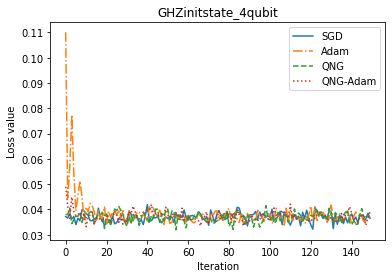

In [7]:
plt.plot(loss_values_sgd, label='SGD', linestyle = '-')
plt.plot(loss_values_adam, label='Adam', linestyle = '-.')
plt.plot(loss_values_qng, label='QNG', linestyle = '--')
plt.plot(loss_values_qng_adam, label='QNG-Adam', linestyle = ':')
plt.title('GHZinitstate_4qubit')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.savefig('GHZinitstate_4qubit.png', format='png', dpi=600)
plt.show() 

np.savetxt("./compare/GHZinitstate_4qubit/loss_values_sgd.csv", loss_values_sgd, delimiter=",")
np.savetxt("./compare/GHZinitstate_4qubit/loss_values_adam.csv", loss_values_adam, delimiter=",")
np.savetxt("./compare/GHZinitstate_4qubit/loss_values_qng.csv", loss_values_qng, delimiter=",")
np.savetxt("./compare/GHZinitstate_4qubit/loss_values_qng_adam.csv", loss_values_qng_adam, delimiter=",")

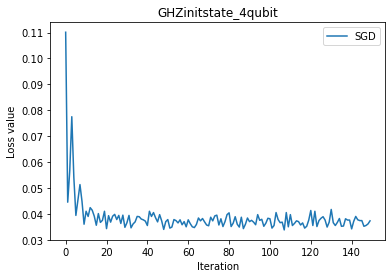

In [9]:
plt.plot(loss_values_adam, label='SGD', linestyle = '-')
plt.title('GHZinitstate_4qubit')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.show() 
